# Anomaly Detection Project

By: Johnathon Smith

Date: Oct 22nd, 2021
***

### Executive Summary
***

__Project Goal__

The goal of this project was to acquire, prepare, and explore Codeup's curriculum access logs in order to answer at least five of the seven questions asked in an email we received.

__Overall Findings__

* The most trafficked lessons are javascript-i for full stack web developers, fundamentals for data science students, and html-css for front end developers.
* The Ceres cohort referred to the javascript lesson far more than the other cohorts in the java full stack web development program.
* Arches referred to javascript-i more than the other cohorts and Kings referred to content way more than the other cohorts in the php full stack web developer program.
* The Darden cohort referred to the Classfication lesson far more than the other cohorts in the data science program.
* There are 20 students that accessed the curriculum less than or equal to 20 times while active.
* These students were mostly java full stack web developers, but three of them were data scientists.
* The most common request was for javascript-i.
* The java full stack web developer graduates are still accessing the spring and javascript-i lessons.
* The php graduates are still accessing the content and javascript-i lessons.
* Data science grads are accessing the fundamentals, sql, and classification lessons.
* The front end grads are mostly accessing the html-css lessons.
* While there are many lessons that only had a few views, some of the most prevalent sections involve regression in excel, and control-structures and promises in javascript.

***
### My Process

* Write a README.md file that details my process, my findings, and instructions on how to recreate my project.
* Acquire the Codeup Curriculum access logs from the Codeup database.
* Clean and prepare the access log data:
    * Added information for the student's program
    * Created columns for access year, month, day, and hour
    * Created columns that identify each user as graduates or current students
    * Split the path string along each '/' character for easier exploration.
    * Drop unnecessary columns.
    * Finally, convert the date column to a datetime object and set it as the index.
* There will be no modeling for this project, so I will not split the data into train, validate, and test before exploration.
* Explore the data and look for anomalous behavior or events.
* Document conclusions, takeaways, and next steps in the Final Report Notebook.

***

### Necessary Imports

In [1]:
import numpy as np
import pandas as pd

#For data acquisition and prep
import wrangle

#For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

### Acquire
***

__Data Dictionary__

| Feature | Datatype | Definition |
|:--------|:---------|:------------|
| path | object | The original request path |
| user_id | int | An arbitrary number assigned to each unique user |
| cohort | object | The cohort the user belongs to |
| ip | object | The ip address of the network the user made the request from |
| start_date | object | The start date of the user's cohort |
| end_date | object | The end date of the user's cohort |
| program | object | The program the user is/was enrolled in |
| subdomain | object | The focus of the program the user is/was enrolled in |
| year | int | The year the curriculum was accessed |
| month | object | The month the curriculum was accessed |
| day | object | The day of the week the curriculum was accessed |
| hour | int | The hour of the day the curriculum was accessed |
| is_graduate | bool | Indicates whether or not the user is a graduate of Codeup |
| current_student | bool | Indicates whether or not the user is a current student at Codeup |
| request_section | object | The first section of the path string |
| request_subject | object | The second section of the path string |
| request_lesson | object | The third section of the path string |
| param_4 | object | The fourth section of the path string |
| param_5 | object | The fifth section of the path string |
| param_6 | object | The sixth section of the path string |
| param_7 | object | The seventh section of the path string |
| param_8 | object | The eighth section of the path string |

__Wrangle the Data__

This project requires that you have your own env.py file to access the Codeup Database. Please ensure you have one in your working directory before attempting to recreate the project.

In [2]:
#This function call will acquire and prepare the data for use in the project
logs = wrangle.wrangle_logs()

In [3]:
#Get a brief overview of the data
logs.head()

,path,user_id,cohort,ip,start_date,end_date,program,subdomain,year,month,...,is_graduate,current_student,request_section,request_subject,request_lesson,param_4,param_5,param_6,param_7,param_8
date,,,,,,,,,,,,,,,,,,,,,
2018-01-26,/,1,Hampton,97.105.19.61,2015-09-22,2016-02-06,PHP Full Stack Web Development,php,2018,January,...,True,False,,,None,None,None,None,None,None
2018-01-26,java-ii,1,Hampton,97.105.19.61,2015-09-22,2016-02-06,PHP Full Stack Web Development,php,2018,January,...,True,False,java-ii,None,None,None,None,None,None,None
2018-01-26,java-ii/object-oriented-programming,1,Hampton,97.105.19.61,2015-09-22,2016-02-06,PHP Full Stack Web Development,php,2018,January,...,True,False,java-ii,object-oriented-programming,None,None,None,None,None,None
2018-01-26,slides/object_oriented_programming,1,Hampton,97.105.19.61,2015-09-22,2016-02-06,PHP Full Stack Web Development,php,2018,January,...,True,False,slides,object_oriented_programming,None,None,None,None,None,None
2018-01-26,javascript-i/conditionals,2,Teddy,97.105.19.61,2018-01-08,2018-05-17,Java Full Stack Web Development,java,2018,January,...,False,True,javascript-i,conditionals,None,None,None,None,None,None


In [4]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 to 2021-04-21
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   path             900222 non-null  object
 1   user_id          900223 non-null  int64 
 2   cohort           847330 non-null  object
 3   ip               900223 non-null  object
 4   start_date       847330 non-null  object
 5   end_date         847330 non-null  object
 6   program          847330 non-null  object
 7   subdomain        847330 non-null  object
 8   year             900223 non-null  int64 
 9   month            900223 non-null  object
 10  day              900223 non-null  object
 11  hour             900223 non-null  int64 
 12  is_graduate      900223 non-null  bool  
 13  current_student  900223 non-null  bool  
 14  request_section  900222 non-null  object
 15  request_subject  731934 non-null  object
 16  request_lesson   226870 non-null  object

In [5]:
logs.describe()

,user_id,year,hour
count,900223.000000,900223.000000,900223.000000
mean,458.825707,2019.477718,12.851656
std,249.296767,0.960970,4.162596
min,1.000000,2018.000000,0.000000
25%,269.000000,2019.000000,10.000000
50%,475.000000,2020.000000,13.000000
75%,660.000000,2020.000000,15.000000
max,981.000000,2021.000000,23.000000


__Key Takeaways__

* Added information for the student's program of study
* Created columns for access year, month, day, and hour
* Created columns that identify each user as graduates or current students
* Split the path string along each '/' character for easier exploration.
* Dropped unnecessary columns.
* Finally, converted the date column to a datetime object and set it as the index.

***

### Explore

In this section I will be answering the questions one by one.

### Question 1

__Which lesson appears to attract the most traffic consistently across cohorts (per program)?__

Since this question is asking for the most consistently trafficked lesson across each program, I will separate the logs dataframe into 4 others, one for each program.

In [6]:
java = logs[logs.subdomain == 'java'].copy()

In [7]:
php = logs[logs.subdomain == 'php'].copy()

In [8]:
ds = logs[logs.subdomain == 'ds'].copy()

In [9]:
fe = logs[logs.subdomain == 'fe'].copy()

What lesson is the most popular among full stack java web developers?

In [10]:
java.path.value_counts(normalize = True).head()

/                           0.050204
javascript-i                0.024471
toc                         0.024431
search/search_index.json    0.021324
java-iii                    0.017779
Name: path, dtype: float64

It seems that the most trafficked lesson for full stack java web developers is javascript-i.

What is the most trafficked lesson for full stack php web developers?

In [11]:
php.path.value_counts(normalize = True)

/                        0.055028
index.html               0.033095
javascript-i             0.024093
html-css                 0.017743
spring                   0.016400
                           ...   
4.0_overview             0.000033
4.1_introduction         0.000033
4.4_functions            0.000033
4.5_imports              0.000033
ajax-api-request.html    0.000033
Name: path, Length: 710, dtype: float64

In [12]:
php.request_section.value_counts(normalize = True).sort_values(ascending=False)

content                        0.209408
javascript-i                   0.121383
html-css                       0.080627
spring                         0.076077
mysql                          0.067664
                                 ...   
ordinary_least_squares.jpeg    0.000033
11._DistributedML              0.000033
introduction-to-matplotlib     0.000033
8.1_Overview                   0.000033
ajax-api-request.html          0.000033
Name: request_section, Length: 94, dtype: float64

It looks like the most trafficked lesson for full stack php developers is index.html and javascript-i.

What is the most trafficked lesson for data science students?

In [13]:
ds.path.value_counts(normalize = True)

/                                           0.080823
search/search_index.json                    0.021303
classification/overview                     0.017261
1-fundamentals/modern-data-scientist.jpg    0.016004
1-fundamentals/AI-ML-DL-timeline.jpg        0.015965
                                              ...   
databases                                   0.000010
sql/database                                0.000010
fundamentals/intro-to-data-science.md       0.000010
python/introduction-to-python.md            0.000010
6-regression/8-Project                      0.000010
Name: path, Length: 682, dtype: float64

In [14]:
ds.request_section.value_counts(normalize = True)

fundamentals                   0.084575
classification                 0.083357
                               0.080823
1-fundamentals                 0.076829
sql                            0.072574
                                 ...   
data-science-pipeline          0.000010
sql.mysql-overview             0.000010
spark-execution-diagram.svg    0.000010
4.2-compare-means              0.000010
7.4.1-pandas-overview          0.000010
Name: request_section, Length: 153, dtype: float64

It looks like the fundamentals section is the most trafficked lesson for data scientists.

What is the most trafficked section for front end developers?

In [15]:
fe.path.value_counts(normalize = True)

content/html-css                               0.4
/                                              0.2
content/html-css/gitbook/images/favicon.ico    0.2
content/html-css/introduction.html             0.2
Name: path, dtype: float64

In [16]:
fe.request_section.value_counts(normalize = True)

content    0.8
           0.2
Name: request_section, dtype: float64

Since there are only 5 entries for front end developers, it's pretty cut and dry. The most trafficked lesson for them is html-css.

__Key Takeaways:__

* The most trafficked lesson for java full stack web developers is javascript-i.
* The most trafficked lesson for php full stack web developers is index.html.
* The most trafficked lesson for data science students is fundamentals.
* The most trafficked lesson for front end developers is html-css.

### Question 2

__Is there a cohort that referred to a lesson significantly more than other cohorts?__

For java full stack web development:

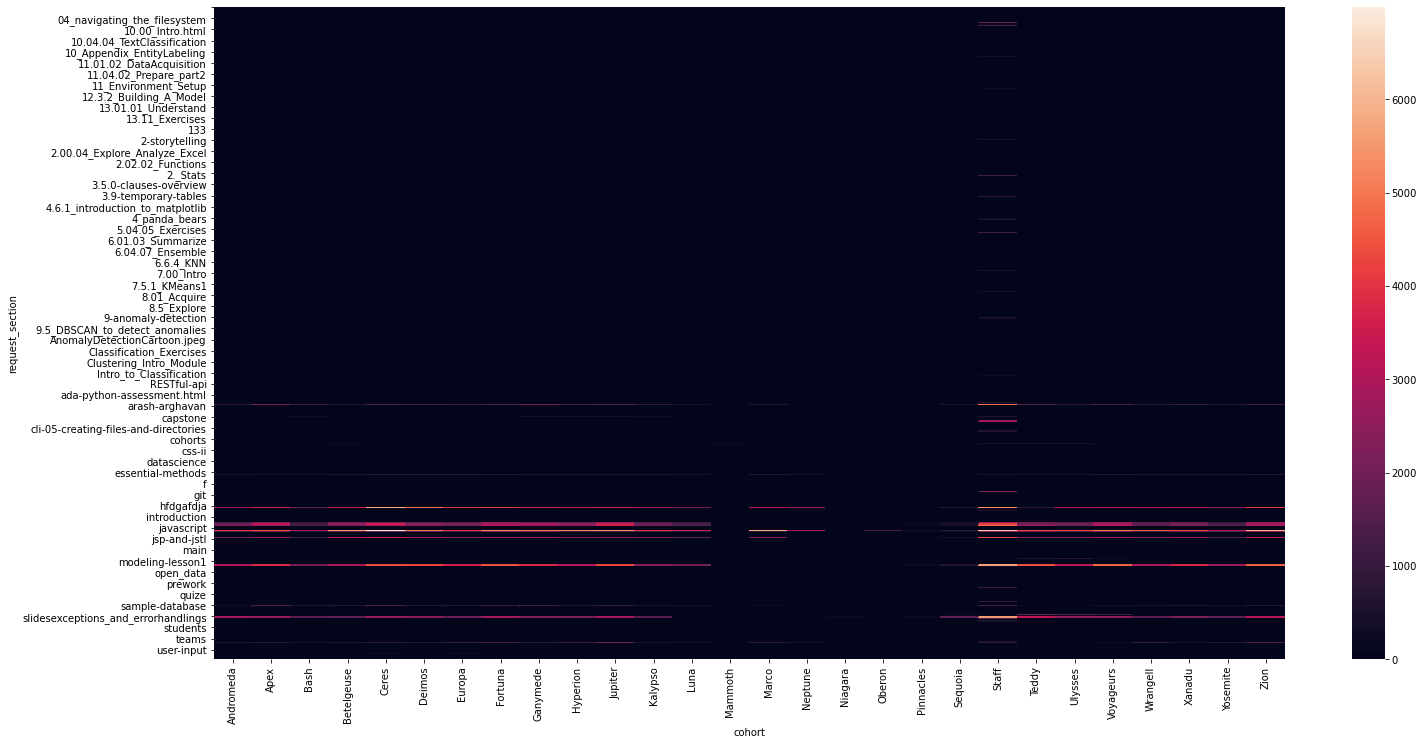

In [18]:
plt.figure(figsize=(24,12))
sns.heatmap(pd.crosstab(java.request_section, java.cohort))
plt.show()

It looks like the Ceres cohort referred to the javascript lesson far more than the other cohorts.

Now do the same for the php full stack web developers.

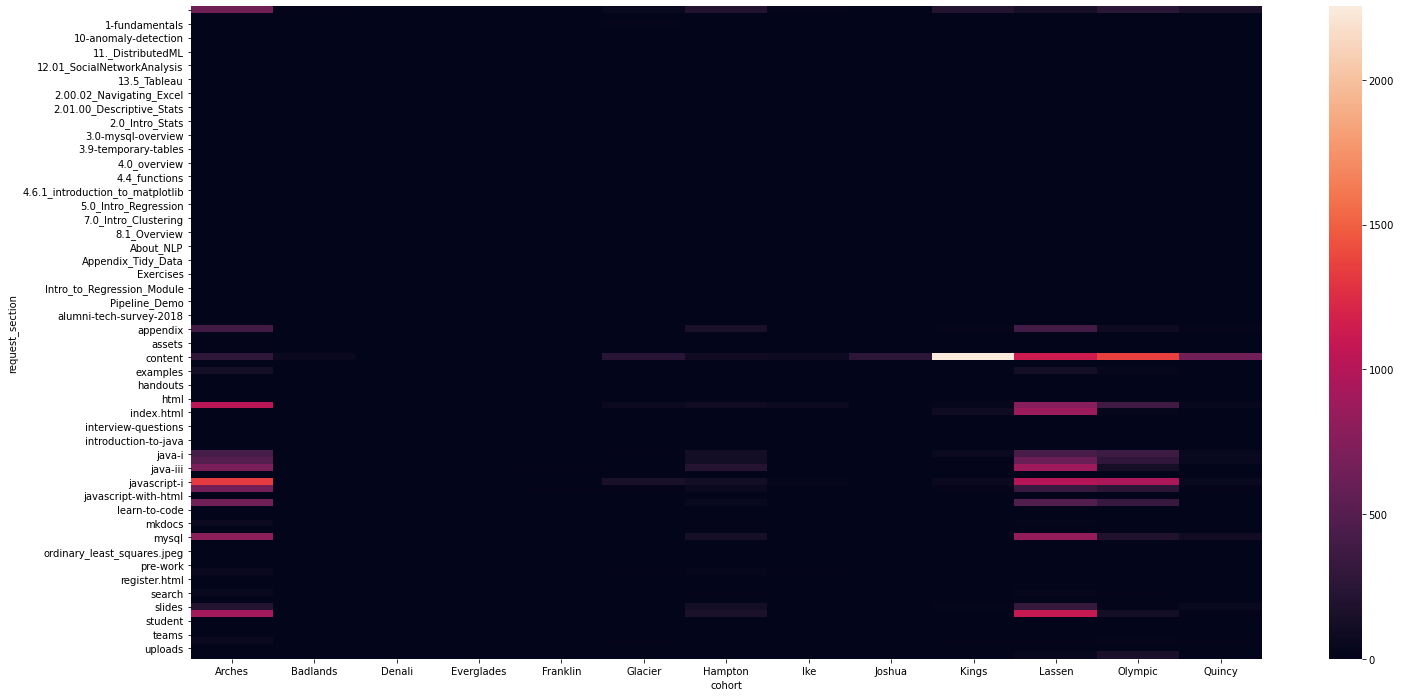

In [19]:
plt.figure(figsize=(24,12))
sns.heatmap(pd.crosstab(php.request_section, php.cohort))
plt.show()

Arches spent referred to javascript-i more than the other cohorts and Kings referred to content way more than the other cohorts.

Now for the data science students.

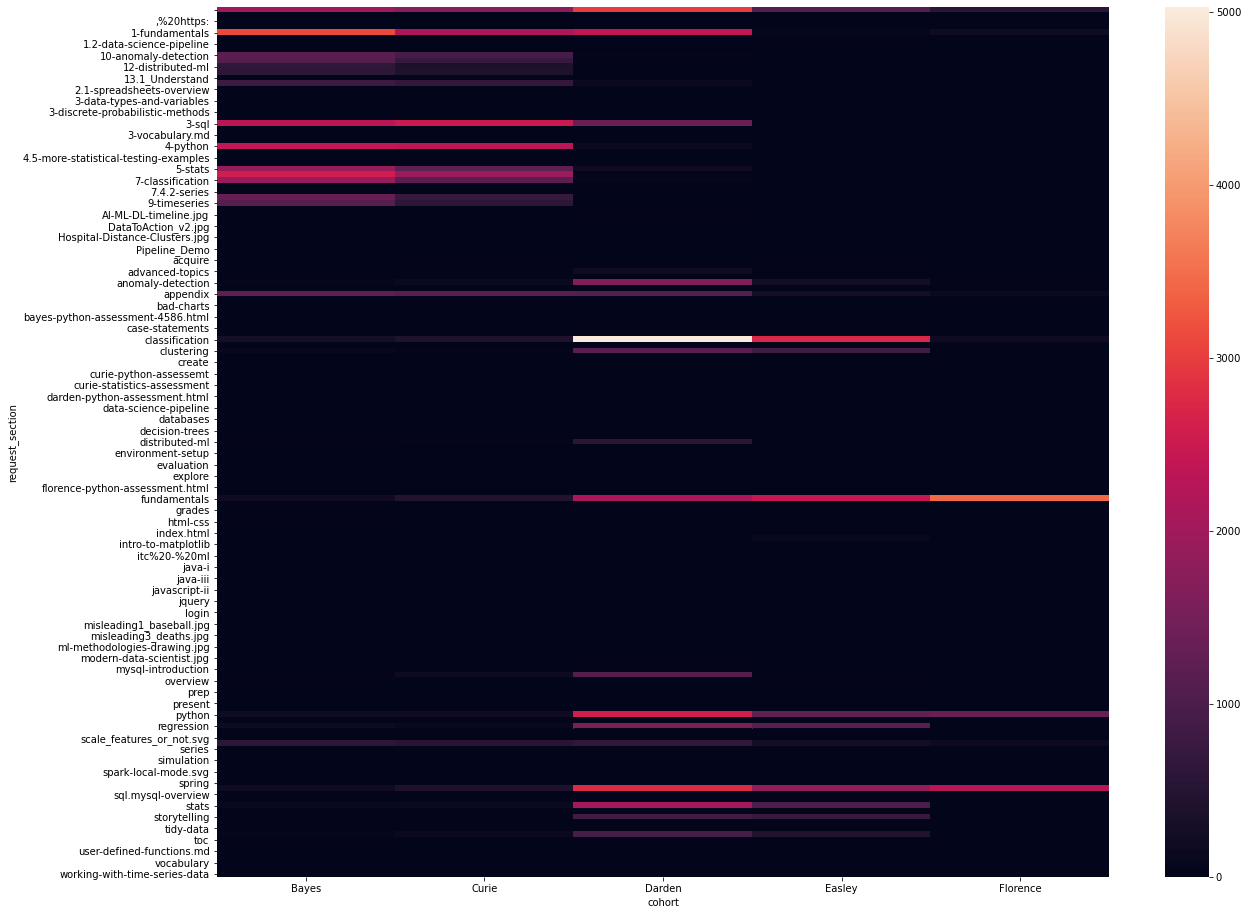

In [20]:
plt.figure(figsize=(20,16))
sns.heatmap(pd.crosstab(ds.request_section, ds.cohort))
plt.show()

The Darden cohort referred to the Classfication lesson far more than the other cohorts.

Now for the front end developers.

__Key Takeaways__

* The Ceres cohort referred to the javascript lesson far more than the other cohorts in the java full stack web development program.
* Arches referred to javascript-i more than the other cohorts and Kings referred to content way more than the other cohorts in the php full stack web developer program.
* The Darden cohort referred to the Classfication lesson far more than the other cohorts in the data science program.
* There is only one cohort listed for the front end program.

### Question 3

__Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?__

I'm assuming that 'when active' means when they are current students. To find these students, I'll create a new dataframe of only requests that were made by students when they were current.

In [21]:
active = logs[logs.current_student == True]

In [22]:
active.user_id.value_counts(normalize = False).tail(20)

961    20
340    18
963    18
968    17
487    17
889    16
697    13
572    12
941    12
679    11
388     8
812     7
956     6
539     5
278     4
832     3
879     1
940     1
918     1
619     1
Name: user_id, dtype: int64

The user_ids above accessed the curriculum less than or equal to 20 times while they were current students.

In [23]:
#To investigate these students, I'll take their user_ids and create a df of just them
low_user_ids = active.user_id.value_counts(normalize = False).tail(20).index.to_list()

In [24]:
low_users = active[active.user_id.isin(low_user_ids)]

In [25]:
low_users.groupby('user_id').subdomain.value_counts()

user_id  subdomain
278      java          4
340      java         18
388      java          8
487      ds           17
539      java          5
572      java         12
619      java          1
679      ds           11
697      ds           13
812      java          7
832      java          3
879      java          1
889      java         16
918      java          1
940      java          1
941      java         12
956      java          6
961      java         20
963      java         18
968      java         17
Name: subdomain, dtype: int64

These students are mostly full stack java web developers. There are also 3 data science students.

In [26]:
low_users.request_section.value_counts()

javascript-i          61
html-css              34
                      25
appendix              19
1-fundamentals        17
toc                   11
java-iii               6
java-ii                4
2-storytelling         2
mysql                  2
javascript-ii          2
jquery                 2
java-i                 1
spring                 1
13-advanced-topics     1
3-sql                  1
4-python               1
search                 1
Name: request_section, dtype: int64

These students were mostly looking for javascript-i.

__Key Takeaways__

* There are 20 students that accessed the curriculum less than or equal to 20 times while active.
* These students were mostly java full stack web developers, but three of them were data scientists.
* The most common request was for javascript-i.

### Question 4

__What topics are grads continuing to reference after graduation and into their jobs (for each program)?__

To answer this question I will form a new dataframe for each program that consists of only requests made by the graduates.

In [27]:
java_grads = java[java.is_graduate == True]

In [28]:
php_grads = php[php.is_graduate == True]

In [29]:
ds_grads = ds[ds.is_graduate == True]

In [30]:
fe_grads = fe[fe.is_graduate == True]

I'll start with the java graduates.

In [31]:
java_grads.path.value_counts(normalize = True)

/                                  0.082245
javascript-i                       0.032703
spring                             0.031957
search/search_index.json           0.030005
html-css                           0.025110
                                     ...   
5.02_Prep                          0.000014
5-regression/1-overview            0.000014
2-stats/2.2-navigating-excel       0.000014
4.6.0_DS_Libraries_Overview        0.000014
6-regression/2-regression-excel    0.000014
Name: path, Length: 820, dtype: float64

In [32]:
java_grads.request_section.value_counts(normalize = True)

spring                 0.130093
javascript-i           0.123761
html-css               0.090801
                       0.082245
mysql                  0.081459
                         ...   
10.02.01_ParseText     0.000014
10.02.02_POSTagging    0.000014
10.02.03_TFIDF         0.000014
10.03_Explore          0.000014
job-board              0.000014
Name: request_section, Length: 241, dtype: float64

The java full stack web developer graduates are still accessing the spring and javascript-i lessons.

Now look at the php graduates.

In [33]:
php_grads.path.value_counts(normalize = True)

/                        0.055028
index.html               0.033095
javascript-i             0.024093
html-css                 0.017743
spring                   0.016400
                           ...   
4.0_overview             0.000033
4.1_introduction         0.000033
4.4_functions            0.000033
4.5_imports              0.000033
ajax-api-request.html    0.000033
Name: path, Length: 710, dtype: float64

In [34]:
php_grads.request_section.value_counts(normalize = True)

content                                  0.209408
javascript-i                             0.121383
html-css                                 0.080627
spring                                   0.076077
mysql                                    0.067664
                                           ...   
2.00.02_Navigating_Excel                 0.000033
2.00.05_Charts_PivotTables_Sparklines    0.000033
2.02.00_Inferential_Stats                0.000033
Exercises                                0.000033
ajax-api-request.html                    0.000033
Name: request_section, Length: 94, dtype: float64

The php graduates are still accessing the content and javascript-i lessons.

Now look at the data science grads.

In [35]:
ds_grads.path.value_counts(normalize = True)

/                                           0.124924
search/search_index.json                    0.042888
sql/mysql-overview                          0.023923
classification/overview                     0.023140
classification/scale_features_or_not.svg    0.019052
                                              ...   
DataToAction_v2.jpg                         0.000087
advanced-topics/tidy-data                   0.000087
10-anomaly-detection/isolation-forests      0.000087
cli/moving-files                            0.000087
individual-project/individual-project       0.000087
Name: path, Length: 437, dtype: float64

In [36]:
ds_grads.request_section.value_counts(normalize = True)

                                                  0.124924
fundamentals                                      0.091518
sql                                               0.090735
classification                                    0.089952
python                                            0.053328
appendix                                          0.044193
3-sql                                             0.044106
search                                            0.042975
1-fundamentals                                    0.040191
anomaly-detection                                 0.039321
6-regression                                      0.032623
stats                                             0.032449
timeseries                                        0.029578
nlp                                               0.029404
regression                                        0.029143
7-classification                                  0.024184
4-python                                          0.0200

Data science grads are accessing the fundamentals, sql, and classification lessons.

Now do the front end grads.

In [37]:
fe_grads.path.value_counts(normalize = True)

content/html-css                               0.4
/                                              0.2
content/html-css/gitbook/images/favicon.ico    0.2
content/html-css/introduction.html             0.2
Name: path, dtype: float64

In [38]:
fe_grads.request_section.value_counts(normalize = True)

content    0.8
           0.2
Name: request_section, dtype: float64

The front end grads are mostly accessing the html-css lessons.

__Key Takeaways__

* The java full stack web developer graduates are still accessing the spring and javascript-i lessons.
* The php graduates are still accessing the content and javascript-i lessons.
* Data science grads are accessing the fundamentals, sql, and classification lessons.
* The front end grads are mostly accessing the html-css lessons.

### Question 5

__Which lessons are least accessed?__ 

In [39]:
logs.path.value_counts().tail(30)

10_Projects                                                     1
content/javascript-with-html.html                               1
capstone/index                                                  1
6-regression/4-multivariate-regression-in-excel                 1
jquery/ajax/requests-and-responses/.json                        1
6-regression/3-univariate-regression-in-excel                   1
codeupexercises                                                 1
codeup-exercises                                                1
6-regression/ordinary_least_squares.jpeg                        1
imports                                                         1
arash-arghavan                                                  1
student/120                                                     1
student/202                                                     1
student/850                                                     1
one                                                             1
capstone/i

__Key Takeaway__

* There are many lessons that only had a few views, but some of the most prevalent sections involve regression in excel and control-structures and promises in javascript.

***

### Conclusion

__Overall Findings__

* The most trafficked lessons are javascript-i for full stack web developers, fundamentals for data science students, and html-css for front end developers.
* The Ceres cohort referred to the javascript lesson far more than the other cohorts in the java full stack web development program.
* Arches referred to javascript-i more than the other cohorts and Kings referred to content way more than the other cohorts in the php full stack web developer program.
* The Darden cohort referred to the Classfication lesson far more than the other cohorts in the data science program.
* There are 20 students that accessed the curriculum less than or equal to 20 times while active.
* These students were mostly java full stack web developers, but three of them were data scientists.
* The most common request was for javascript-i.
* The java full stack web developer graduates are still accessing the spring and javascript-i lessons.
* The php graduates are still accessing the content and javascript-i lessons.
* Data science grads are accessing the fundamentals, sql, and classification lessons.
* The front end grads are mostly accessing the html-css lessons.
* While there are many lessons that only had a few views, some of the most prevalent sections involve regression in excel, and control-structures and promises in javascript.

### With More Time...

If I had more time, I would continue exploring the data to answer the other questions. I would also create more visualizations and improve the ones I already have.